# Testing Trained Network

In [54]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from model import EncodeNetwork, LSTM_Network, DecodeNetwork
from mpl_toolkits import mplot3d
import binvox_rw;
import os
import random
import cv2
%matplotlib inline

In [55]:
with open('chkpt/epoch41.pt', 'rb') as f: 
    loaded = torch.load(f, 'cuda')

In [56]:
encoder = EncodeNetwork().cuda()
lstm = LSTM_Network().cuda()
decoder = DecodeNetwork().cuda()

encoder.load_state_dict(loaded['Encoder Params'])
lstm.load_state_dict(loaded['LSTM Params'])
decoder.load_state_dict(loaded['Decoder Params'])

<All keys matched successfully>

In [57]:
with open('PlaneVoxels/103c9e43cdf6501c62b600da24e0965/model.binvox','rb') as f:
    m1 = binvox_rw.read_as_3d_array(f)

/tmp/ipykernel_35634/2053147884.py:12: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


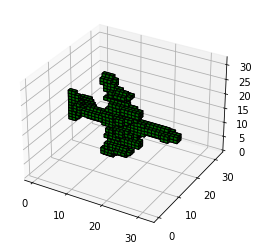

In [58]:
data = np.uint8(m1.data)
# Set the figure size
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# Random data points between 0 and 1

# Create a new figure
fig = plt.figure()

# Axis with 3D projection
ax = fig.gca(projection='3d')

# Plot the voxels
ax.voxels(data, edgecolor="k", facecolors='green')

# Display the plot
plt.show()

In [44]:
def makeData(path,n):
    all_png = [path+i for i in os.listdir(path) if i.endswith('.png')]
    choices = random.sample(all_png,k=n)
    return choices
def makeLabel(path):
    with open(path+'/model.binvox','rb') as f:
        m1 = binvox_rw.read_as_3d_array(f)
    return m1.data

In [1]:
list_impaths = makeData('PlaneRenderings/103c9e43cdf6501c62b600da24e0965/rendering/',5)

h0 = torch.zeros((128, 4, 4, 4)).cuda()
s0 = torch.zeros((128, 4, 4, 4)).cuda()
list_im = []
for i in list_impaths:
    im = cv2.imread(i)
    list_im.append(im)
    im = cv2.resize(im, (127,127), interpolation=cv2.INTER_AREA)
    im.transpose(2,0,1)
    im = torch.tensor(np.rollaxis(im,2,start=0), device='cuda')
    im = im.float()
    s0,h0 = lstm(encoder(im).cuda(),s0,h0)
h0 = h0.reshape(1,128,4,4,4).cuda()
decoded = decoder(h0).cuda()

NameError: name 'makeData' is not defined

In [2]:
decoded[0].shape

NameError: name 'decoded' is not defined

In [47]:
arr = (decoded[0,0] < decoded[0,1]).cpu().detach().numpy()

/opt/conda/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.canvas.print_figure(bytes_io, **kw)


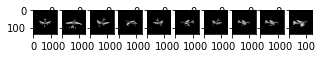

In [48]:
plt.figure(figsize=(5,5))
for i in range(len(list_im)):
    plt.subplot(1, len(list_im), i+1)
    plt.imshow(list_im[i])
plt.show()

/tmp/ipykernel_35634/3773481147.py:10: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


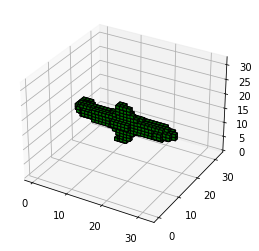

In [50]:
data = (decoded[0,0] < decoded[0,1]).cpu().detach().numpy()
# Set the figure size

# Random data points between 0 and 1

# Create a new figure
fig = plt.figure()

# Axis with 3D projection
ax = fig.gca(projection='3d')

# Plot the voxels
ax.voxels(data, edgecolor="k", facecolors='green')

# Display the plot
plt.show()

In [36]:
list_impaths = makeData('PlaneRenderings/123ba1ebe2ee533ef0c45eff2a917cc9/rendering/',10)

h0 = torch.zeros((128, 4, 4, 4)).cuda()
s0 = torch.zeros((128, 4, 4, 4)).cuda()
list_im = []
for i in list_impaths:
    im = cv2.imread(i)
    list_im.append(im)
    im = cv2.resize(im, (127,127), interpolation=cv2.INTER_AREA)
    im.transpose(2,0,1)
    im = torch.tensor(np.rollaxis(im,2,start=0), device='cuda')
    im = im.float()
    s0,h0 = lstm(encoder(im).cuda(),s0,h0)
h0 = h0.reshape(1,128,4,4,4).cuda()
decoded = decoder(h0).cuda()

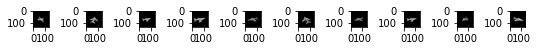

In [37]:
for i in range(len(list_im)):
    plt.subplot(1, len(list_im), i+1)
    plt.imshow(list_im[i])
plt.show()

/tmp/ipykernel_35634/3773481147.py:10: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


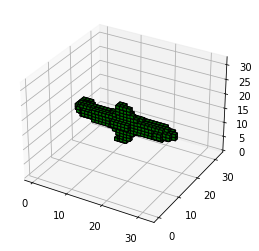

In [51]:
data = (decoded[0,0] < decoded[0,1]).cpu().detach().numpy()
# Set the figure size

# Random data points between 0 and 1

# Create a new figure
fig = plt.figure()

# Axis with 3D projection
ax = fig.gca(projection='3d')

# Plot the voxels
ax.voxels(data, edgecolor="k", facecolors='green')

# Display the plot
plt.show()

In [15]:
with open('PlaneVoxels/123ba1ebe2ee533ef0c45eff2a917cc9/model.binvox','rb') as f:
    m1 = binvox_rw.read_as_3d_array(f)

/tmp/ipykernel_35634/2053147884.py:12: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


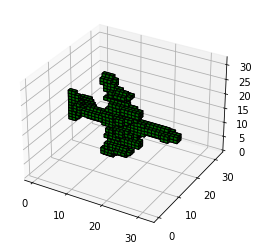

In [52]:
data = np.uint8(m1.data)
# Set the figure size
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# Random data points between 0 and 1

# Create a new figure
fig = plt.figure()

# Axis with 3D projection
ax = fig.gca(projection='3d')

# Plot the voxels
ax.voxels(data, edgecolor="k", facecolors='green')

# Display the plot
plt.show()